In [11]:
import sys
sys.path.append("../..") # adds higher directory to python modules path
from src.pypm import metrics, data_io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import date, timedelta

def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)

awu = data_io.load_eod_data('AWU')
bmg = data_io.load_eod_data('BMG')
cuu = data_io.load_eod_data('CUU')


def plot_function(series_dict: dict, x_lab: str="date", y_lab: str="price"):
    """
    Args:
        series_dict (dict): dictionary of data series, where key is the label name.
    """

    for d in series_dict:
        plt.plot(series_dict[d], label=d)

    plt.legend()
    plt.xlabel(x_lab)
    plt.ylabel(y_lab)
    plt.gcf().autofmt_xdate()
    plt.grid()
    plt.show()

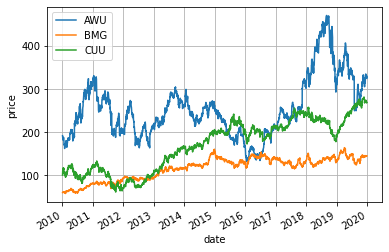

In [12]:
#  Figure 2.1:

stonks = {"AWU": awu["close"],
          "BMG": bmg["close"],
          "CUU": cuu["close"]}
plot_function(stonks)

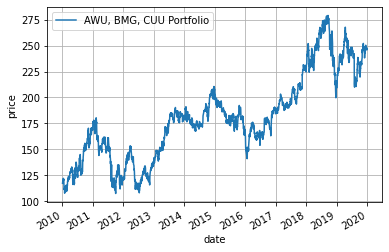

In [13]:
#  Figure 2.2:

stonks = {"AWU, BMG, CUU Portfolio": (awu["close"] + bmg["close"] + cuu["close"])/3}
plot_function(stonks)

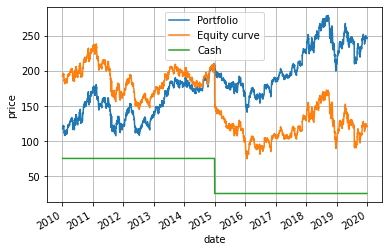

In [20]:
#  Figure 2.3:

# not sure how the correct graph looks...
cash = awu["close"].copy()
cost = awu["close"].copy()
cash[:"2015-01-01"] = 75
cash["2015-01-01":] = 25

cost[:] = 0.3/5

stonks = {"Portfolio": (awu["close"] + bmg["close"] + cuu["close"])/3,
          "Equity curve": (cash + (awu["close"] + bmg["close"] + cuu["close"])/3) - cost.cumsum(),
          "Cash": cash}

plot_function(stonks)

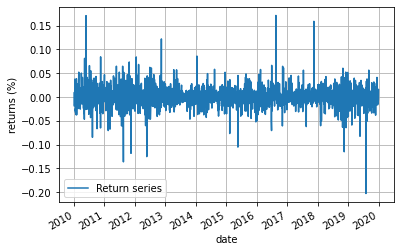

In [21]:
#  Figure 2.4:

from src.pypm import metrics
r_ser = metrics.calculate_return_series(awu["close"])

ser = {"Return series": r_ser}

plot_function(ser, y_lab="returns (%)")

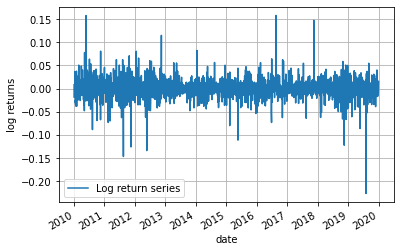

In [22]:
#  Figure 2.5:

r_ser_log = metrics.calculate_log_return_series(awu["close"])

ser = {"Log return series": r_ser_log}

plot_function(ser, y_lab="log returns")

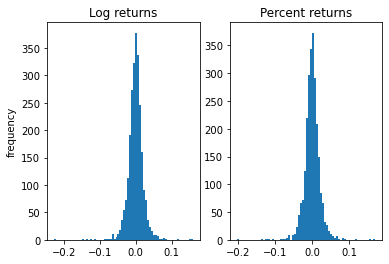

In [23]:
#  Figure 2.6:

r_ser = metrics.calculate_return_series(awu["close"])
r_ser_log = metrics.calculate_log_return_series(awu["close"])
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_title("Log returns")
ax1.hist(r_ser_log, bins=70)
ax1.set_ylabel('frequency')

ax2.set_title("Percent returns")
ax2.hist(r_ser, bins=70)
plt.show()

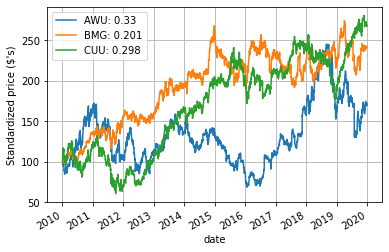

In [24]:
#  Figure 2.7:

r_ser_log = metrics.calculate_log_return_series(awu["close"])
awu_vol = metrics.calculate_annualized_volatility(r_ser_log)
r_ser_log = metrics.calculate_log_return_series(bmg["close"])
bmg_vol = metrics.calculate_annualized_volatility(r_ser_log)
r_ser_log = metrics.calculate_log_return_series(cuu["close"])
cuu_vol = metrics.calculate_annualized_volatility(r_ser_log)

# standardize so that you start by investing 100 dollar in each stock:
stonks = {f"AWU: {round(awu_vol, 3)}": 100*awu["close"]/awu["close"][0],
          f"BMG: {round(bmg_vol, 3)}": 100*bmg["close"]/bmg["close"][0],
          f"CUU: {round(cuu_vol, 3)}": 100*cuu["close"]/cuu["close"][0]}
plot_function(stonks, y_lab="Standardized price ($'s)")

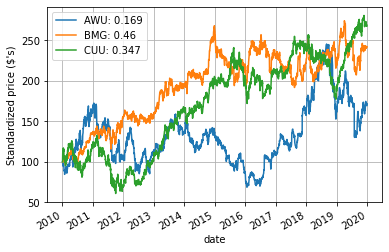

In [25]:
#  Figure 2.8:

awu_vol = metrics.calculate_sharpe_ratio(awu["close"])
bmg_vol = metrics.calculate_sharpe_ratio(bmg["close"])
cuu_vol = metrics.calculate_sharpe_ratio(cuu["close"])


stonks = {f"AWU: {round(awu_vol, 3)}": 100*awu["close"]/awu["close"][0],
          f"BMG: {round(bmg_vol, 3)}": 100*bmg["close"]/bmg["close"][0],
          f"CUU: {round(cuu_vol, 3)}": 100*cuu["close"]/cuu["close"][0]}
plot_function(stonks, y_lab="Standardized price ($'s)")

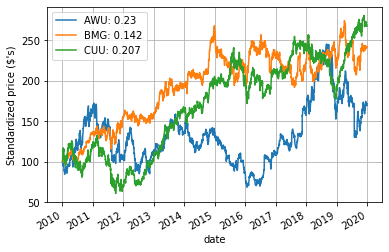

In [27]:
#  Figure 2.9:


r_ser_log = metrics.calculate_return_series(awu["close"])
awu_vol = metrics.calculate_annualized_downside_deviation(r_ser_log)
r_ser_log = metrics.calculate_return_series(bmg["close"])
bmg_vol = metrics.calculate_annualized_downside_deviation(r_ser_log)
r_ser_log = metrics.calculate_return_series(cuu["close"])
cuu_vol = metrics.calculate_annualized_downside_deviation(r_ser_log)


stonks = {f"AWU: {round(awu_vol, 3)}": 100*awu["close"]/awu["close"][0],
          f"BMG: {round(bmg_vol, 3)}": 100*bmg["close"]/bmg["close"][0],
          f"CUU: {round(cuu_vol, 3)}": 100*cuu["close"]/cuu["close"][0]}
plot_function(stonks, y_lab="Standardized price ($'s)")

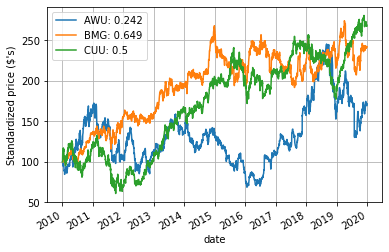

In [31]:
#  Figure 2.10:

awu_vol = metrics.calculate_sortino_ratio(awu["close"])
bmg_vol = metrics.calculate_sortino_ratio(bmg["close"])
cuu_vol = metrics.calculate_sortino_ratio(cuu["close"])


stonks = {f"AWU: {round(awu_vol, 3)}": 100*awu["close"]/awu["close"][0],
          f"BMG: {round(bmg_vol, 3)}": 100*bmg["close"]/bmg["close"][0],
          f"CUU: {round(cuu_vol, 3)}": 100*cuu["close"]/cuu["close"][0]}
plot_function(stonks, y_lab="Standardized price ($'s)")

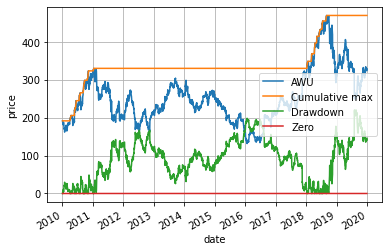

In [32]:
#  Figure 2.11:

awu_draw = metrics.calculate_drawdown_series(awu["close"], method="dollar")


ze = awu["close"][:].copy()
ze[:] = 0

stonks = {f"AWU": awu["close"],
          "Cumulative max": awu["close"].cummax(),
          "Drawdown": awu_draw,
          "Zero": ze
          }

plot_function(stonks)
